In [14]:
from openpiv import tools, pyprocess, validation, filters, scaling 
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

folder = '/home/edo20/PIV'

In [15]:
# Define checkerboard and noise functions
def checkerboard(shape):
    return np.indices(shape).sum(axis=0) % 2

# Define noise function
def noise(shape):
    
    # Image A
    seed_a = 1
    generator = np.random.default_rng(seed_a) # Seed a generator for results to be reproducigles
    noise = generator.uniform(0,256, shape)
    noise = noise.astype(int)
    
    A = noise
    
    # Image B
    seed_b = 2
    generator = np.random.default_rng(seed_b) # Seed a generator for results to be reproducibles
    noise = generator.uniform(0,256, shape)
    noise = noise.astype(int)
    
    B = noise
    
    return A, B

# Define correlation function
def corr2_coeff(A, B):
    # Rowwise mean of input arrays & subtract from input arrays themeselves
    A_mA = A - A.mean(1)[:, None]
    B_mB = B - B.mean(1)[:, None]

    # Sum of squares across rows
    ssA = (A_mA**2).sum(1)
    ssB = (B_mB**2).sum(1)

    # Finally get corr coeff
    return np.dot(A_mA, B_mB.T) / np.sqrt(np.dot(ssA[:, None],ssB[None]))

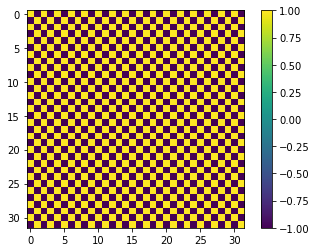

In [16]:
shape = (32,32)

A = checkerboard(shape)
B = checkerboard(shape)

CorrChecker = corr2_coeff(A,B)

plt.imshow(CorrChecker)
plt.colorbar()
plt.savefig('../Immagini_relazione/cross_corr_2d.png',format = 'png', dpi = 1e3)

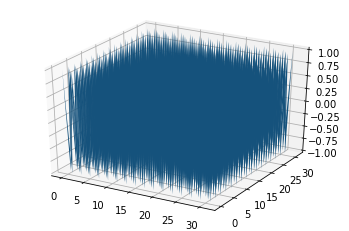

In [28]:
from mpl_toolkits.mplot3d import Axes3D

def surface_plot (matrix, **kwargs):
    # acquire the cartesian coordinate matrices from the matrix
    # x is cols, y is rows
    (x, y) = np.meshgrid(np.arange(matrix.shape[0]), np.arange(matrix.shape[1]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, matrix, **kwargs)
    return (fig, ax, surf)

(fig, ax, surf) = surface_plot(CorrChecker)
plt.savefig('../Immagini_relazione/cross_corr_3d.png',format = 'png', dpi = 1e3)
plt.show()

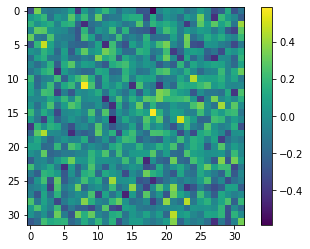

In [18]:
A, B = noise(shape)

CorrNoise = corr2_coeff(A,B)

plt.imshow(CorrNoise)
plt.colorbar()
plt.savefig('../Immagini_relazione/noise_corr_2d.png',format = 'png', dpi = 1e3)

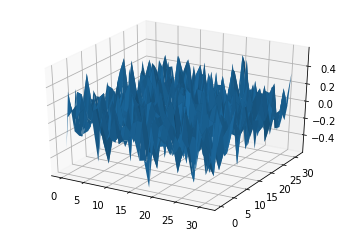

In [27]:
from mpl_toolkits.mplot3d import Axes3D

def surface_plot (matrix, **kwargs):
    # acquire the cartesian coordinate matrices from the matrix
    # x is cols, y is rows
    (x, y) = np.meshgrid(np.arange(matrix.shape[0]), np.arange(matrix.shape[1]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, matrix, **kwargs)
    return (fig, ax, surf)

(fig, ax, surf) = surface_plot(CorrNoise)
plt.savefig('../Immagini_relazione/noise_corr_3d.png',format = 'png', dpi = 1e3)
plt.show()
